# Week-5 Exploratory Data Analyss - MLS


## Home loan Approval case study

## Problem Statement 
The XYZ Bank, a prominent financial institution located in a metropolitan area, encounters difficulties in comprehensively understanding the various factors influencing loan approvals. Despite implementing several strategies, they struggle to grasp the intricate patterns within their applicant data, hindering their ability to make informed decisions regarding loan approvals.


## Objective
You hired as a data analyst in the XYZ bank, the objective is to conduct exploratory data analysis (EDA) to uncover hidden patterns and insights within the bank's loan application dataset. Challenges include deciphering complex relationships between applicant attributes and loan approval outcomes, identifying potential biases or anomalies, and extracting actionable insights to enhance decision-making processes. The expected outcome is to provide the bank with a deeper understanding of their loan application data, enabling them to refine their lending criteria, mitigate risks, and improve overall operational efficiency

### Data Dictionary

**Loan_ID** -Unique Loan ID

**Gender**-Male/ Female

**Married**-Applicant married (Y/N)

**Dependents**-Number of dependents

**Education**-Applicant Education (Graduate/ Under Graduate)

**Self_Employed**-Self employed (Y/N)

**ApplicantIncome**-Applicant income

**CoapplicantIncome**-Coapplicant income

**LoanAmount**-Loan amount in thousands

**Loan_Amount_Term**-Term of loan in months

**Credit_History**-credit history meets guidelines

**Property_Area**- Urban/ Semi Urban/ Rural

**Loan_Status** -(Target) Loan approved (Y/N)


**Table of contents**
1. univariate Analysis 
2. Bivariate Analysis 
3. Multivariate Analysis

#### Import the required libraries  

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

**Use the data which we used in the last session.**

In [14]:
# read the k-circle mart sales dataset
df = pd.read_csv("loan_dataset.csv")

# print the first five rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.shape

(614, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [18]:
# Load ID is just the representation of the applicant
# So it can be removed from the analysis

In [19]:
df.drop(columns='Loan_ID',inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<a id="uni"> </a>
# 1. Univariate Analysis
The univariate analysis focuses on a single variable in the data. The main purpose of this type of  analysis is to understand each variable in the data using various statistical and visualization techniques. It helps to study the pattern in each variable. The univariate analysis contains various techniques for numerical as well as a categorical variable.

## 1.1 Numerical

In [20]:
num_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

### Histogram

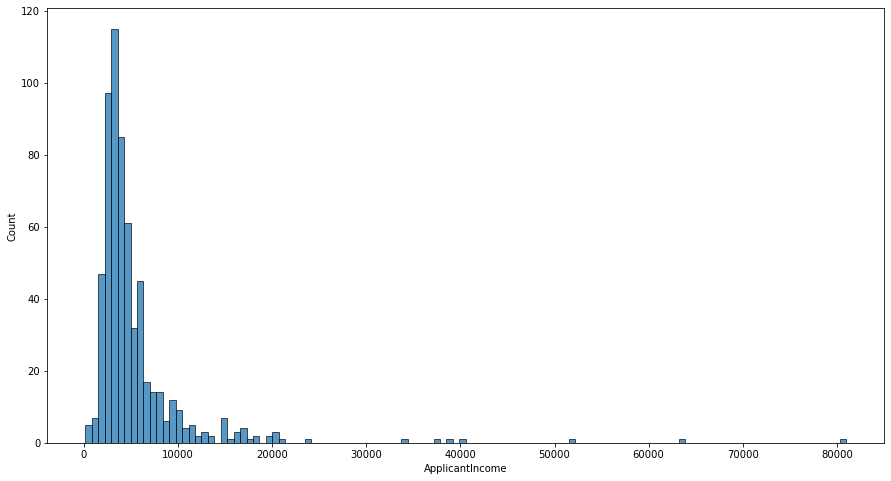

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(data=df,x='ApplicantIncome')
plt.show()

Inference:

Most of the Applicant income is ranging from 0-10000 rupees.

### Kernel Density Estimation

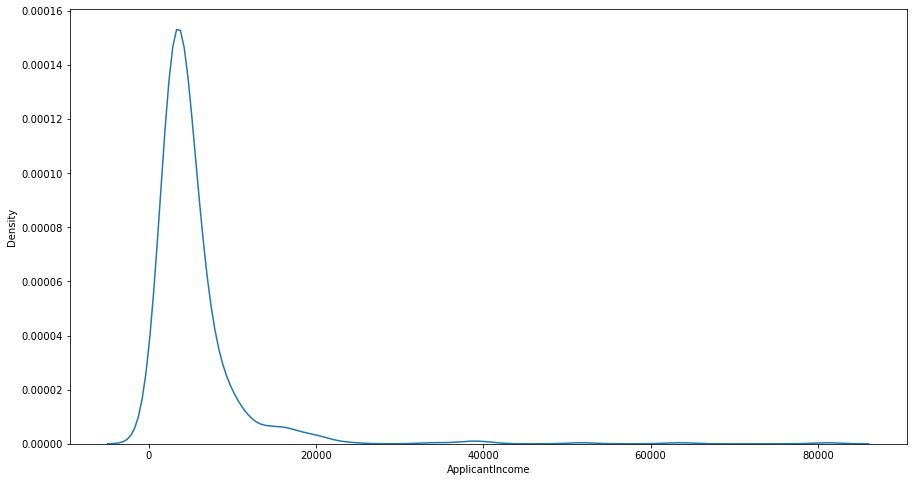

In [22]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=df,x='ApplicantIncome')
plt.show()

Inference:

Data is right skewed \
For an examplr, probability of getting income as 10000 = 0.00013(apprx)

## Distplot

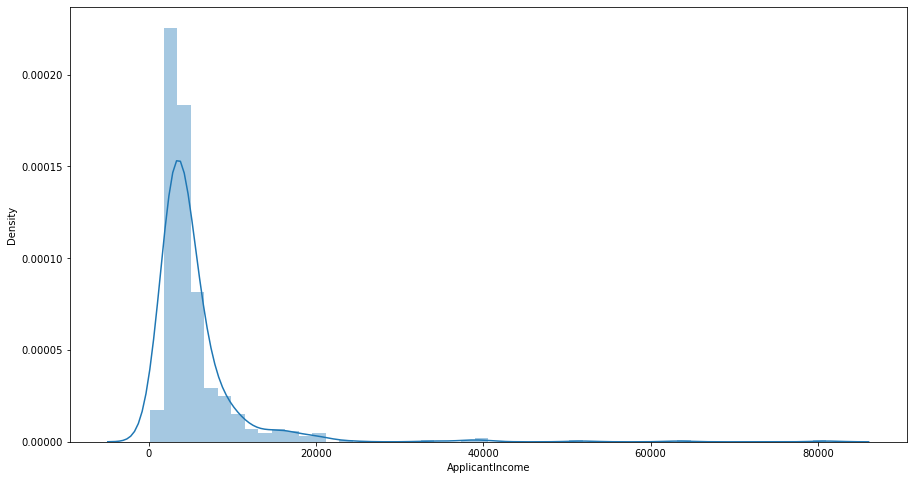

In [23]:
plt.figure(figsize=(15,8))
sns.distplot(df['ApplicantIncome'])
plt.show()

### Boxplot

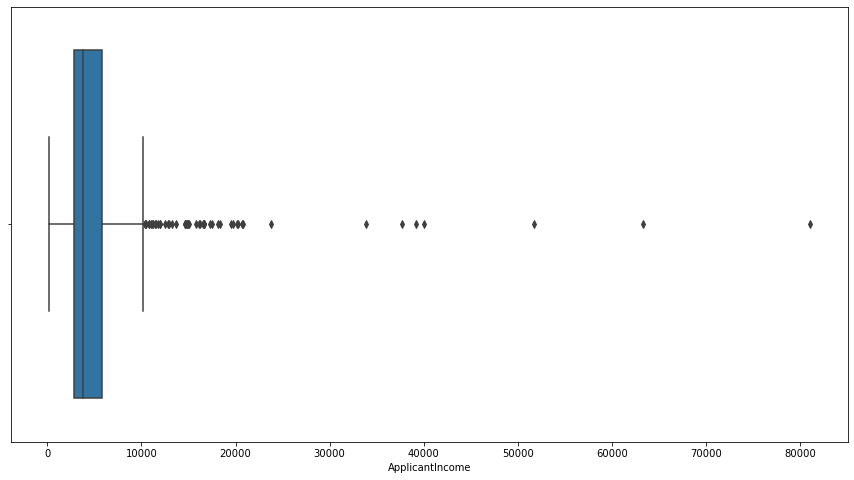

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='ApplicantIncome')
plt.show()

Inference

1. Box plot shows there is presence of outliers
2. Data is right skeweness

### Violin Plot (Kde plot+Boxplot)

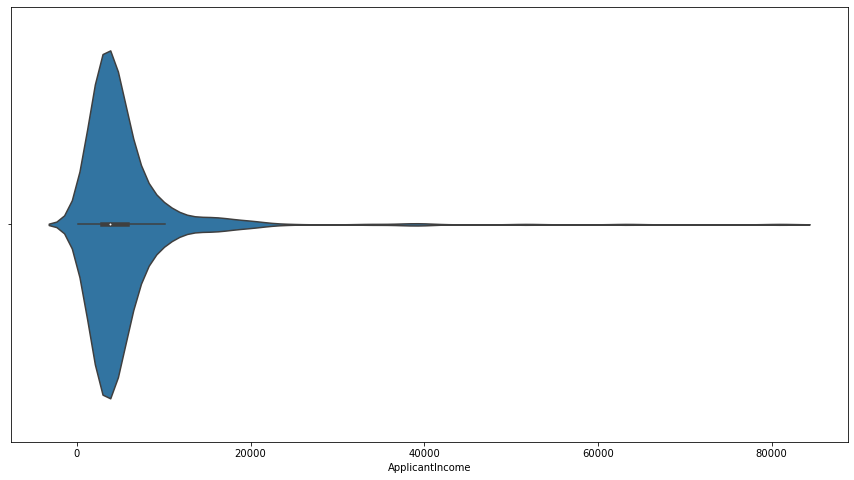

In [25]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df,x='ApplicantIncome')
plt.show()

## 1.1 Categroical

### Bar Graph

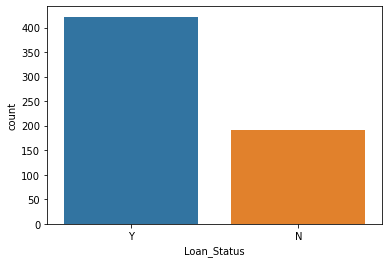

In [26]:
sns.countplot(data=df,x='Loan_Status')
plt.show()

<AxesSubplot:>

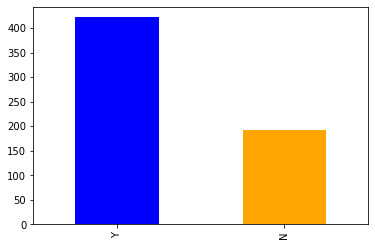

In [27]:
df['Loan_Status'].value_counts().plot(kind='bar',color=['blue','orange']) # = matplotlib

Inferece : count of loan approved is higher than the count of loan reject

###  Pie Chart

<AxesSubplot:ylabel='Loan_Status'>

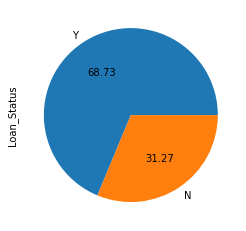

In [28]:
df['Loan_Status'].value_counts().plot(kind='pie',autopct='%.2f')

Inference:

68.7% of loan are approved

<a id="introduction_to_bivariate_analysis"> </a>
# 2. Bivariate Analysis

Bivariate analysis is the analysis of two variables (attributes).<br>
Now, we will explore the association between each variable of the dataset and the target variable to find the relationship between them.

<a id="types_of_bivariate_analysis"> </a>

## Types of Bivariate Analysis
<html>
<body>

<ul>
Follwing are the types of bivariate analysis:<br>
    
  1. Numerical and Numerical<br>
  2. Categorical and Numerical<br>
  3. Categorical and Categorical<br>  
  
</ul>  
</body>
</html>

## 2.1 Numerical Vs Numerical

### Scatter plot

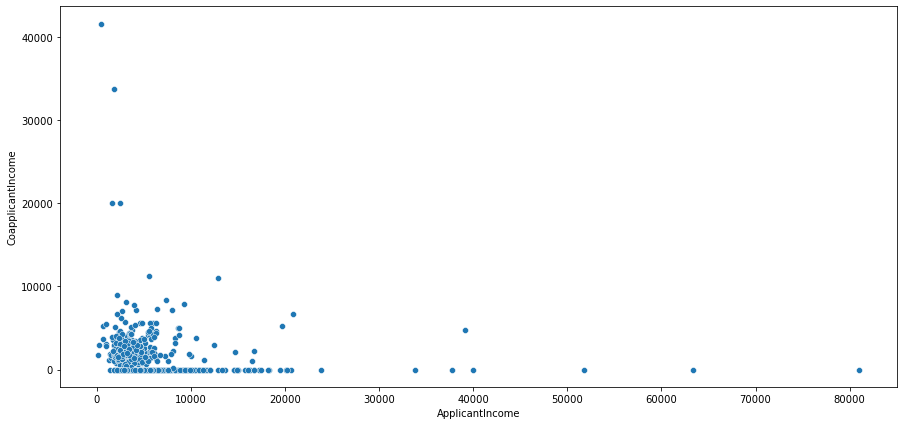

In [29]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='ApplicantIncome',y='CoapplicantIncome')
plt.show()

Inference:

1) There is no loan applicant with high app income and high coapp income \
2) There are people with high appling income with low coapp income and vice versa. \
3) There is light positive correlation

## 2.2 Numerical Vs Categorical

## Swarmplot

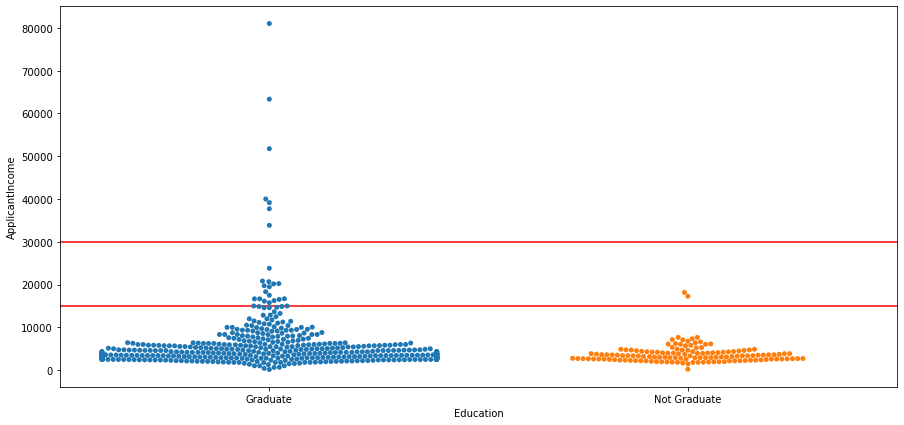

In [30]:
plt.figure(figsize=(15,7))
sns.swarmplot(data=df,x='Education',y='ApplicantIncome')
plt.axhline(30000,color='red')
plt.axhline(15000,color='red')
plt.show()

Inference : 

1) Income of graduates are higher than the non graduates \
2) Majority of Salary of both graduates and non graduates are from 0-10000 \
3) Proportion of graduates are  higher than non graduates.

### Boxplot

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

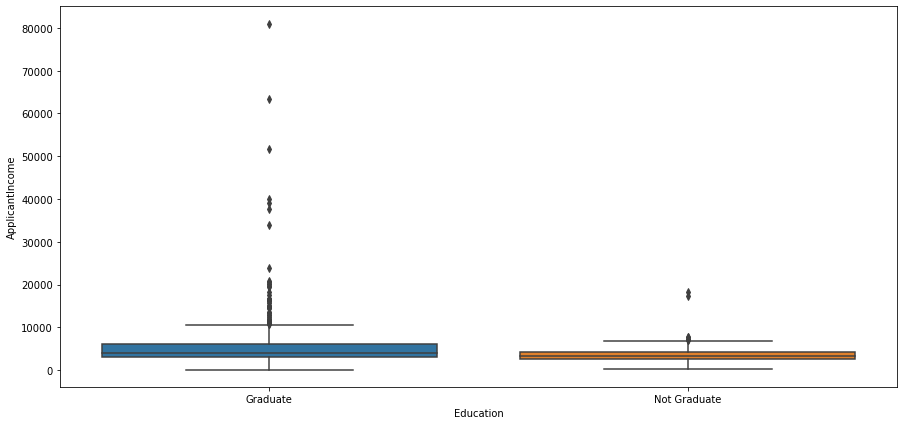

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='Education',y='ApplicantIncome')

Inference

1) More outliers are found in graduates comapred to non gradutes \
2) Both are right skewd \
3) IQR of Graduate is higher than non gradutes

### Violin Plot

In [32]:
tips = sns.load_dataset("tips")
df_tips = tips.copy()

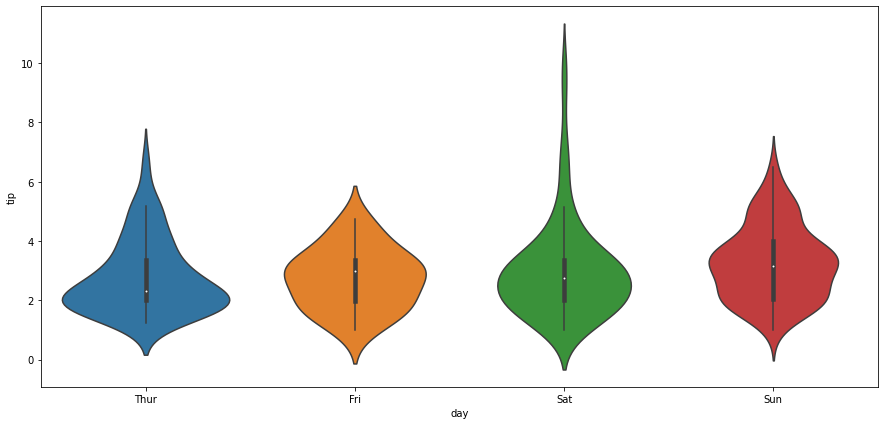

In [33]:
plt.figure(figsize=(15,7))
sns.violinplot(data=df_tips,x='day',y='tip')
plt.show()

Inference

1) Distributuon on friday and sun are approximately normal \
2) Distribution on sat and thur are right skewed

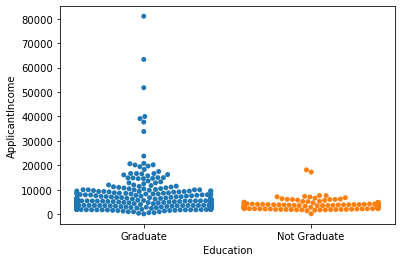

In [46]:
sns.swarmplot(data=df, x='Education', y='ApplicantIncome')
plt.show()

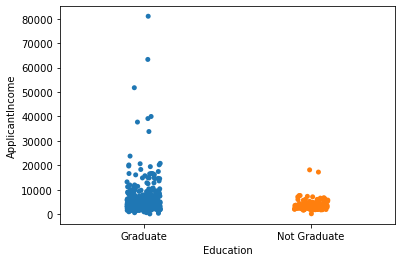

In [45]:
sns.stripplot(data=df, x='Education', y='ApplicantIncome')
plt.show()

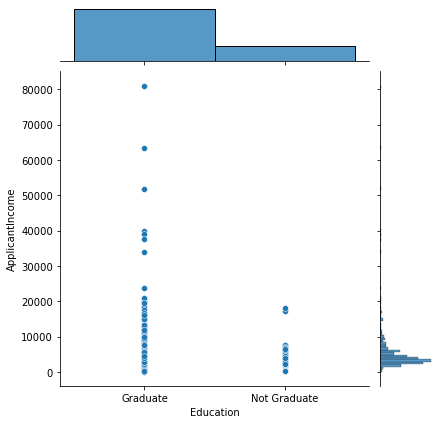

In [44]:
sns.jointplot(data=df, x='Education', y='ApplicantIncome')
plt.show()

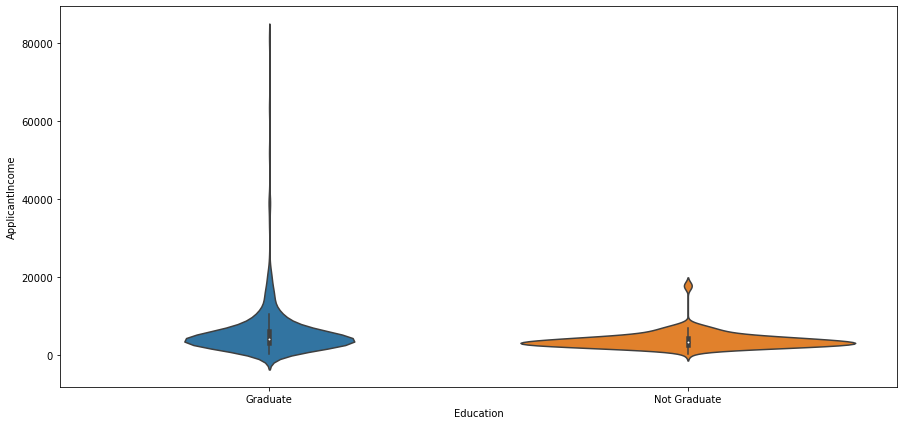

In [34]:
plt.figure(figsize=(15,7))
sns.violinplot(data=df,x='Education',y='ApplicantIncome')
plt.show()

Inference:
    
1) Both are right skewed \
2) More outliers are in graduates.

## Line Plot with groupby

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
df.groupby(['Dependents']).mean()['ApplicantIncome']

Dependents
0     4917.423188
1     5962.274510
2     4926.782178
3+    8581.215686
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='Dependents'>

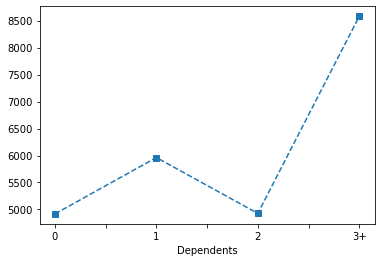

In [37]:
df.groupby(['Dependents']).mean()['ApplicantIncome'].plot(kind='line',marker='s',linestyle='--')

Inference

1) Income is more for 3+ dependants \
2) Income is less for 0 and 2 dependants compared to 1 dependants

## 3.3 Categorical Vs Categorical

### Bargraph with crosstab

<AxesSubplot:xlabel='Education'>

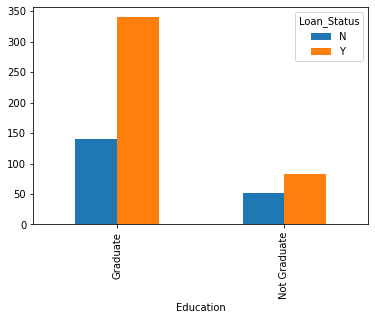

In [38]:
pd.crosstab(df['Education'],df['Loan_Status']).plot(kind='bar')

### Ratio method

In [39]:
pd.crosstab(df['Education'],df['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


Graduate ratio => 0.3 : 0.7 \
Graduate ratio => 0.4 : 0.6 

Ratio are similar. So there is significant relation b/w graduate and loan status.

<a id="multi"> </a>
# 3. Multivariate Analysis

Multivariate analysis is used to study two or more variables in the data. The main purpose is to understand the relationship between the variables using various statistical and visualization techniques. The analysis helps to find the variables which are highly correlated to each other; also, it exhibits the effect of one variable on other variables in the data. </b>

## 3.1 Graphs with hue

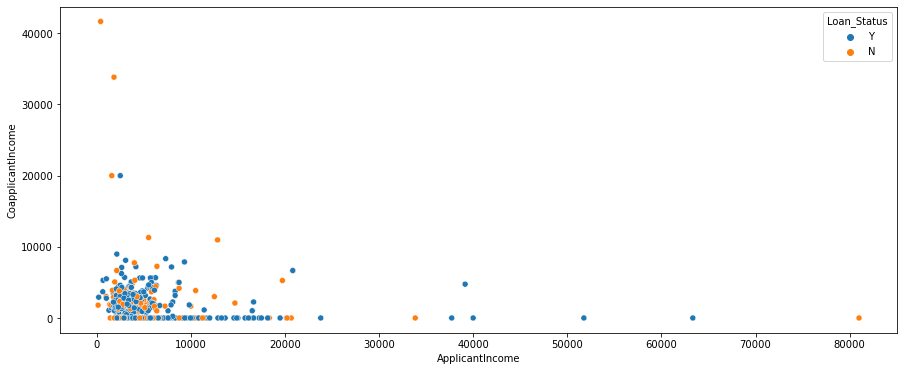

In [40]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status')
plt.show()

Inference : Applicant income is given more importance than the coapplicant income

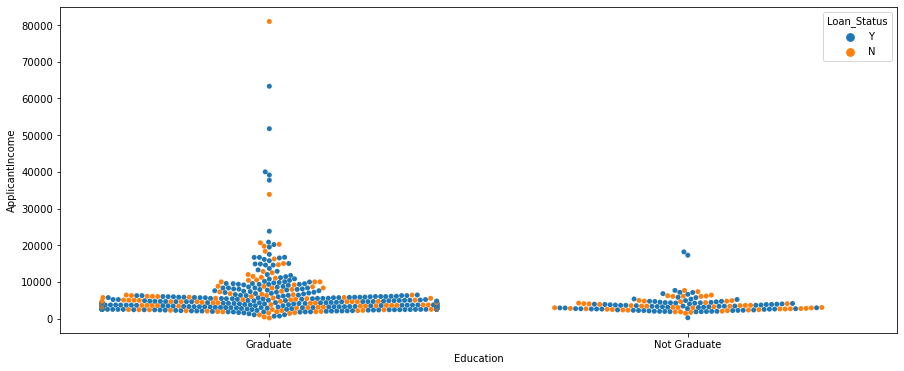

In [41]:
plt.figure(figsize=(15,6))
sns.swarmplot(data=df,x='Education',y='ApplicantIncome',hue='Loan_Status')
plt.show()

Inference : Most of the Graduate with high income , their loans are approved.

## 3.2 Pairplot

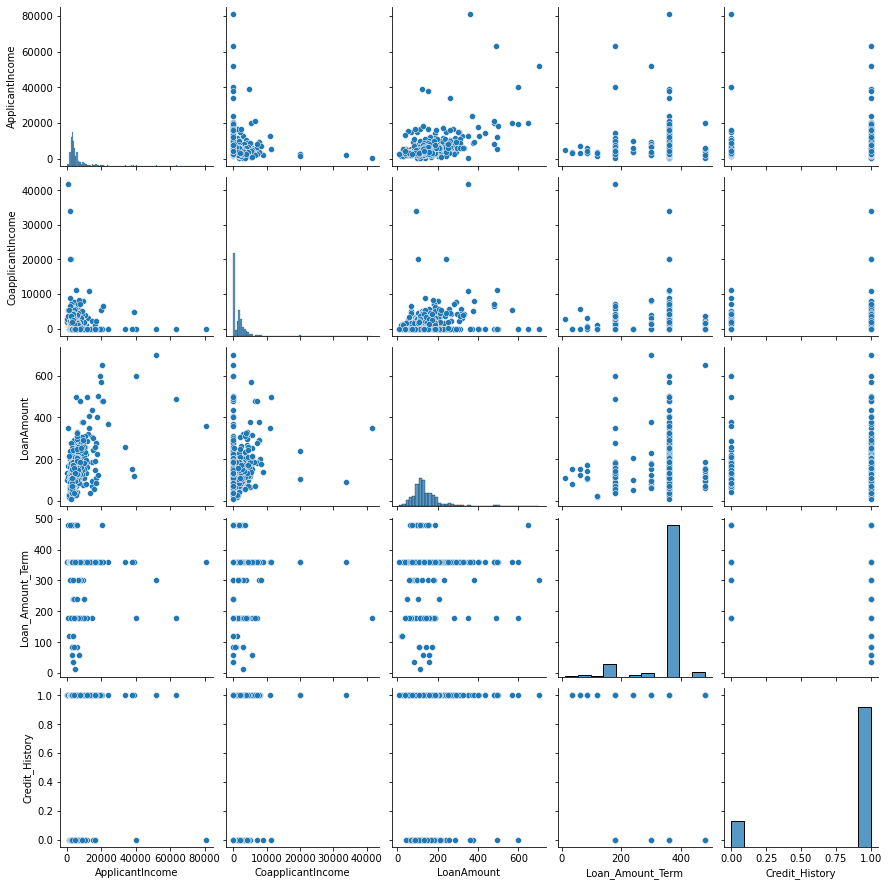

In [42]:
sns.pairplot(df)

### 3.3 Heatmap with Correlation

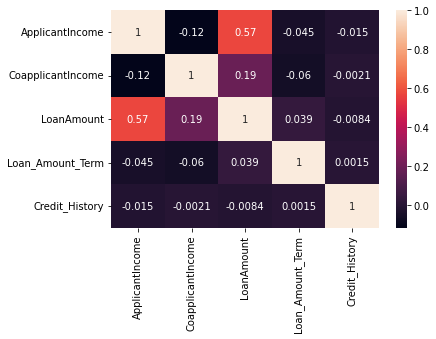

In [43]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Inference:
    
Applicant Income and Loan Amount are 57% positively correlated \
No other strong relationship is found

## Power Ahead!